 


- *Umwiza, Soleil S.*
- *Student number: 4386019*
--------------------------------------

## Phase 1: Proposal

#### **Introduction**

Phishing attacks have become a persistent and evolving threat, targeting individuals and organizations worldwide. To combat this menace, the integration of artificial intelligence (AI) technologies has emerged as a potent solution. By leveraging AI’s capabilities in data analysis, pattern recognition, and anomaly detection, organizations can enhance their defenses against phishing attacks.



## 🟡 Domain understanding



#### **What?**

*What is the main goal of this project?*

I want to implement a model that will detect phishing emails automatically without human intervention.



#### **Why**
*Why is this project important?*

With the development of technology, emails are widely used in business, professional, and social communication. Criminals also see this as an opportunity to steal people's money or access personal information and use them in their criminal activities.

Unfortunately, not everyone is able to recognize a phishing email just by looking at it. People are still being victims of phishing emails and other online criminalities. Because of this issue, having a system that will detect phishing emails and flag them will help users of emails recognize those unwanted emails and prevent the damage this can cause to email users.

#### **Who**
*Who will benefit from the results of this project?*

This model will benefit the following stakeholders:
 Companies/Institutions that use emails in their work or business will benefit from this system because it will protect their business and the data of their employees and clients
Normal users of email are the main target of phishing therefore will benefit from this system.
Email providers have the responsibility of protecting their client's data, therefore this system will be beneficial for them


#### **When**
*When will you deliver this projetc?*

For this project, I am using the Jira software as a tool for my planning and progress of increments. I create use stories to work on during a sprint and for each Sprint I set its goal. Below is the screenshot of my sprint.



This project will consist of 2 iterations of challenge 1. The masterpiece challenge will be delivered on the 26th of November.

#### **How**
*How will the project achieve its objectives?* 

For this project, I will need the dataset to train and test my model. The data required are sample emails with their types. For Cleaning, processing, and analyzing the dataset, Python will be used as a programming language and Jupyter Notebook will be used as a development environment. 
Dataset: The dataset that will be used in this project is publicly available on Kaggle. The dataset is composed of 18650 rows and 2 columns(Email body and Email type).
Machine Learning Algorithm: Since the expected outcome of this project is a model that will classify incoming emails, Classification will be a suitable algorithm to use in this project.




#### **Positive Impact of AI on detecting phishing emails**



 
Natural Language Processing (NLP) algorithms in AI can analyze the content of emails to identify phishing attempts. They can recognize patterns of language commonly used in phishing emails, such as urgent requests for personal information or suspicious links.



AI can contribute to phishing prevention by analyzing user behavior and identifying anomalies that might indicate a phishing attempt. By establishing baselines of normal user behavior, AI systems can detect deviations such as sudden increases in email volume, unusual file access patterns, or atypical login locations. These anomalies trigger alerts, allowing organizations to investigate and respond promptly.


#### **Negative Impact of AI on detecting phishing emails**



AI can be used by attackers to create more sophisticated and convincing phishing emails. Machine learning algorithms can analyze massive datasets to craft messages that are highly targeted and personalized, making them more difficult for traditional security measures to detect.
Automated Generation of Malicious Content:

AI algorithms can be used to automatically generate malicious content, including phishing emails. This automation can lead to a higher volume of phishing attacks as attackers can deploy AI tools to create and distribute phishing emails at scale.
Evasion of Traditional Security Measures:

As AI evolves, attackers may use machine learning techniques to design phishing emails that can better evade traditional email security filters. This makes it challenging for organizations to rely solely on rule-based systems to detect and prevent phishing attacks.


AI, including chatbots like ChatGPT, can be used for various purposes, both positive and negative. While AI has the potential to bring about significant positive impacts in areas such as healthcare, education, and customer service, it can also be misused for malicious activities, including phishing.



## **🔬 Research questions**

#### **Main question**

***What are the characteristics of a phishing email?***



#### **Sub Questions**

|                     Sub question                  |                Possible answers                              |
|---------------------------------------------------|--------------------------------------------------------------|           
| How do I recognize a phishing email from its title?|   Look for strange or suspicious email addresses.           |            
| How can I detect if attackers want to steal my sensitive information such as login credentials?|Watch out for threatening      language that pressures you to act quickly.|
                                                                                            



### 🟡 Data Sourcing


Define Objectives: 

-To implement a machine learning model for emails that predicts whether an email is phishing or safe.

Data Requirements: Determine the data requirements:
- Text data: Email body.
- Labels: Each email needs to be flagged as phishing or safe
Data Sources: Identify potential data sources:

- Publicly available datasets: The data is available publicly on the Kaggle website, and can be downloaded freely

Data Legality and Ethics:
- Use only publicly available data or data with appropriate licenses.
- Data used should not contain personal details or any sensitive data

Data Diversity: 
- For analyzing phishing emails, any source email provider can be used as long as it is publicly available or has an appropriate license

Version Control: 

 -GitHub will be used to track all changes that will be performed during preprocessing, this will help to revert changes as needed.
 
Iterative Process:
- Continuously monitor the model's performance and gather feedback.
- If the model is not performing well, consider reevaluating and updating the data sources.





I have found a number of datasets from Kaggle  which will enable me to bring my challenge to a successful conclusion. The datasets are as follows:

- **phishing.csv** : This dataset is  contains all the the phishing email
- **data_extracted_easy_ham.csv** :This one contains all safe email



### 🟡 Analytic Approach


Since the expected outcome of this project is a model that will classify incoming emails as phishing or safe, Classification will be a suitable algorithm to use in this project.









# Phase 2:   📦 Data Provisioning 



## Data requirements 


The datasets contains two data one for phishing and one for safe email. They both have `11` columns. 

My goal is to make a model that predicts if the email is safe or phishing. Since this is a classification problem. Feature selection is a crucial step in building a machine learning model, as it helps improve model performance by selecting the most relevant features and reducing overfitting. 


## Data collection


> This data is available publicly on the Kaggle website, and can be downloaded freely
: phishing_&_ham_emails. (2023, March 23). Kaggle. https://www.kaggle.com/datasets/mohamedouledhamed/phishing-and-ham-emails


In [3]:
import re
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import warnings
pd.set_option("max_colwidth", 200)
pd.set_option("display.float_format", '{:.2f}'.format)


warnings.filterwarnings('ignore')



print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", sns.__version__)   

df1 = pd.read_csv("phishing.csv", index_col=0)
df2= pd.read_csv("data_extracted_easy_ham.csv", index_col=0)

print(df1.shape)
print(df2.shape)



scikit-learn version: 1.3.0
pandas version: 1.5.3
seaborn version: 0.12.2
(2239, 12)
(2551, 12)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\csten\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df2.head()

,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
From,,,,,,,,,,,,
kre@munnari.OZ.AU,Robert Elz <kre@munnari.OZ.AU,Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500\n From: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n Message-ID: <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n | ...","Thu, 22 Aug 2002 18:26:25 +0700",127.0.0.1,exmh-workers-admin@example.com,zzzz@localhost.netnoteinc.com,text/plain; charset=us-ascii,13258.1030015585@munnari.OZ.AU,NaN,NaN
Steve_Burt@cursor-system.com,Steve Burt <Steve_Burt@cursor-system.com,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoogroups.com>",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Greek sculptor behind the plan, judged that the\n limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the\n Mount Athos monastic comm...","Thu, 22 Aug 2002 12:46:18 +0100",NaN,Steve_Burt@cursor-system.com,zzzz@localhost.netnoteinc.com,text/plain; charset=US-ASCII,5EC2AD6D2314D14FB64BDA287D25D9EF12B4F6@exchange1.cps.local,NaN,NaN
timc@2ubh.com,Tim Chapman,zzzzteana <zzzzteana@yahoogroups.com>,[zzzzteana] Moscow bomber,"Man Threatens Explosion In Moscow \n\nThursday August 22, 2002 1:40 PM\nMOSCOW (AP) - Security officers on Thursday seized an unidentified man who\nsaid he was armed with explosives and threatened...","Thu, 22 Aug 2002 13:52:38 +0100",217.36.23.185,timc@2ubh.com,zzzz@localhost.netnoteinc.com,text/plain; charset=US-ASCII,E17hrT0-0004gj-00@rhenium.btinternet.com,NaN,NaN
monty@roscom.com,Monty Solomon <monty@roscom.com,undisclosed-recipient: ;,[IRR] Klez: The Virus That Won't Die,"Klez: The Virus That Won't Die\n \nAlready the most prolific virus ever, Klez continues to wreak havoc.\n\nAndrew Brandt\n>>From the September 2002 issue of PC World magazine\nPosted Thursday, Aug...","Thu, 22 Aug 2002 09:15:25 -0400",209.202.248.109,irregulars-admin@tb.tf,zzzz@localhost.netnoteinc.com,"text/plain; charset=""us-ascii""",p04330137b98a941c58a8@[209.202.248.109],NaN,NaN
tony@linuxworks.com.au,Tony Nugent <tony@linuxworks.com.au,Exmh Users Mailing List <exmh-users@example.com>,Re: Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrote:\n\n> Hi!\n> \n> Is there a command to insert the signature using a combination of keys and not\n> to have sent the mail to insert it then?\n\nI sim...","Thu, 22 Aug 2002 23:36:32 +1000",NaN,exmh-users-admin@example.com,zzzz@localhost.netnoteinc.com,NaN,200208221336.g7MDaWX26868@hobbit.linuxworks.com.au.nospam,NaN,NaN


In [5]:
df2.head()

,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
From,,,,,,,,,,,,
kre@munnari.OZ.AU,Robert Elz <kre@munnari.OZ.AU,Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>,Re: New Sequences Window,"Date: Wed, 21 Aug 2002 10:54:46 -0500\n From: Chris Garrigues <cwg-dated-1030377287.06fa6d@DeepEddy.Com>\n Message-ID: <1029945287.4797.TMDA@deepeddy.vircio.com>\n\n\n | ...","Thu, 22 Aug 2002 18:26:25 +0700",127.0.0.1,exmh-workers-admin@example.com,zzzz@localhost.netnoteinc.com,text/plain; charset=us-ascii,13258.1030015585@munnari.OZ.AU,NaN,NaN
Steve_Burt@cursor-system.com,Steve Burt <Steve_Burt@cursor-system.com,"""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoogroups.com>",[zzzzteana] RE: Alexander,"Martin A posted:\nTassos Papadopoulos, the Greek sculptor behind the plan, judged that the\n limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the\n Mount Athos monastic comm...","Thu, 22 Aug 2002 12:46:18 +0100",NaN,Steve_Burt@cursor-system.com,zzzz@localhost.netnoteinc.com,text/plain; charset=US-ASCII,5EC2AD6D2314D14FB64BDA287D25D9EF12B4F6@exchange1.cps.local,NaN,NaN
timc@2ubh.com,Tim Chapman,zzzzteana <zzzzteana@yahoogroups.com>,[zzzzteana] Moscow bomber,"Man Threatens Explosion In Moscow \n\nThursday August 22, 2002 1:40 PM\nMOSCOW (AP) - Security officers on Thursday seized an unidentified man who\nsaid he was armed with explosives and threatened...","Thu, 22 Aug 2002 13:52:38 +0100",217.36.23.185,timc@2ubh.com,zzzz@localhost.netnoteinc.com,text/plain; charset=US-ASCII,E17hrT0-0004gj-00@rhenium.btinternet.com,NaN,NaN
monty@roscom.com,Monty Solomon <monty@roscom.com,undisclosed-recipient: ;,[IRR] Klez: The Virus That Won't Die,"Klez: The Virus That Won't Die\n \nAlready the most prolific virus ever, Klez continues to wreak havoc.\n\nAndrew Brandt\n>>From the September 2002 issue of PC World magazine\nPosted Thursday, Aug...","Thu, 22 Aug 2002 09:15:25 -0400",209.202.248.109,irregulars-admin@tb.tf,zzzz@localhost.netnoteinc.com,"text/plain; charset=""us-ascii""",p04330137b98a941c58a8@[209.202.248.109],NaN,NaN
tony@linuxworks.com.au,Tony Nugent <tony@linuxworks.com.au,Exmh Users Mailing List <exmh-users@example.com>,Re: Insert signature,"On Wed Aug 21 2002 at 15:46, Ulises Ponce wrote:\n\n> Hi!\n> \n> Is there a command to insert the signature using a combination of keys and not\n> to have sent the mail to insert it then?\n\nI sim...","Thu, 22 Aug 2002 23:36:32 +1000",NaN,exmh-users-admin@example.com,zzzz@localhost.netnoteinc.com,NaN,200208221336.g7MDaWX26868@hobbit.linuxworks.com.au.nospam,NaN,NaN


## Data understanding

### Exploratory Data Analysis


As it is mentioned in the introduction, the datasets are downloaded from [Kaggle Phishing and ham emails](https://www.kaggle.com/datasets/mohamedouledhamed/phishing-and-ham-emails). I have 2 datasets, one for `phishing emails` which i call `df1` and the other for `Valid/safe emails` which i call `df2`. Below I am reading both datasets and print their shapes, we can see that they have the same number of columns/features.

### 📃 Sample the data

Below I am viewing both datasets to have an impression of the data and see if indeed columns names of both datasets match. For that I am printing 5 random rows.

In [6]:
df1.sample(5)

,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
From,,,,,,,,,,,,
update@paypal.com,PayPal Inc.,"geeks@example.com, philen@example.com, geeks-owner@example.com,\n geeks-outgoing@example.com, user@example.com, nelson@example.com,\n slashdot@example.com, ceremony-bounces@example.com, ceremony@e...",Security Notification,[],"Tue, 20 Feb 2007 06:28:17 +0600",NaN,update@paypal.com,user@login.example.com,"multipart/alternative;\n\tboundary=""--22064056690310311""",CGRWHEQDSQDSDSMIMXPEXL@hotmail.com,858.00,NaN
aw-confirm@eBay.com,eBay <aw-confirm@eBay.com,undisclosed-recipients: ;,eBay Notification,[],"Sun, 20 Nov 2005 03:17:59 +0000",82.79.198.130,user@mail.example.com,user@example.com,"multipart/related;\n boundary=""d4becff5-a712-4880-9e57-b902917ad5e1""",200511210117.UAA26541@mail.example.com,243.00,NaN
custsupport_7729087377id@key.com,KEYBank,user <user@example.com>,KeyBank Reminder: Please Update Your Data,"[, ]","Wed, 25 Oct 2006 07:42:21 -0500 (EST)",57.204.100.2,online_support_id_101068693730id@key.com,user@example.com,"multipart/related; \n\tboundary=""QP_MA..95YW0AS3.U1""",20061025124221.8A18616298@mail.example.com,NaN,15729.00
onlinesupport_id_37197454.cust@53.com,Fifth Third Bank,<joliveira@example.com>,"Official Information To Fifth Third Bank Clients [Thu,\n 17 Aug 2006 12:13:13 -0240]","[, ]","Thu, 17 Aug 2006 12:13:13 -0240",62.212.224.163,andiy@0733.com,user@example.com,"multipart/related; type=""multipart/alternative"";\n boundary=""----=_NextPart_000_006A_01C6C220.6BEF8880""",20060817121201.E2F32621D0F@mail.example.com,334.00,NaN
service@bankofamerica.com,Bank Of America Billing Center <service@bankofamerica.com,user@example.com,Last Notice,"Verify Your Account Details As part of mesures of ensuring a safer and more secure Banking environment,We have re-structured our Banking servers . Hence, we have decided to put an extra verificati...",20 Apr 2007 02:57:47 +0200,NaN,admin@mail.adraconsulting.com,user@login.example.com,text/html,20070420005747.27084.qmail@mail.adraconsulting.com,1148.00,NaN


In [7]:
df2.sample(5)

,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
From,,,,,,,,,,,,
joe@barrera.org,Joseph S. Barrera III,FoRK <fork@example.com>,flavor cystals,"Can anyone stop talking politics long enough to let me know that,\nyes, indeed, they do remember the Suburban Lawns?\n\nBetter yet, tell me where I should be listening for new music now that\nP2P ...","Sat, 21 Sep 2002 22:59:23 -0700",127.0.0.1,fork-admin@xent.com,yyyy@localhost.example.com,text/plain; charset=us-ascii; format=flowed,3D8D5C3B.2090202@barrera.org,NaN,NaN
rssfeeds@example.com,boingboing <rssfeeds@example.com,yyyy@example.com,1Mb/s through mud,"URL: http://boingboing.net/#85531633\nDate: Not supplied\n\nThe DoE has announced a high-speed data-transfer that runs on drillpipe, \nthrough ""a 4-inch diameter steel pipe immersed in electricall...","Mon, 07 Oct 2002 08:00:22 -0000",127.0.0.1,rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210070800.g9780NK23227@dogma.slashnull.org,NaN,NaN
owen@permafrost.net,Owen Byrne <owen@permafrost.net,Bill Stoddard <bill@wstoddard.com>,Re: The case for spam,--------------080808010909060409040405\nContent-Type: text/plain; charset=us-ascii; format=flowed\nContent-Transfer-Encoding: 7bit\n\nBill Stoddard wrote:\n\n>>No one likes commercial spam. \n>> ...,"Thu, 22 Aug 2002 18:25:48 -0300",192.168.123.179,fork-admin@xent.com,yyyy@localhost.netnoteinc.com,"multipart/related;\n boundary=""------------080808010909060409040405""",3D6556DC.5070408@permafrost.net,NaN,NaN
rssfeeds@example.com,ask <rssfeeds@example.com,yyyy@example.com,Mac OS X browsers,URL: http://www.askbjoernhansen.com/archives/2002/09/07.html\nDate: 2002-09-07T22:25:08-08:00\n\nRael is plagued by MSIE instability on Mac OS X. I use a recent nightly build \nof Chimera as my de...,"Tue, 01 Oct 2002 08:01:48 -0000",127.0.0.1,rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210010801.g9181mK15711@dogma.slashnull.org,NaN,NaN
timc@2ubh.com,Tim Chapman,zzzzteana <zzzzteana@yahoogroups.com>,[zzzzteana] Language problems,"Ananova: \nNewspaper's readers complain over 'let's have sex' picture caption\n\nReaders of an African newspaper have complained after a picture caption\nabout jewellery contained the words ""let'...","Tue, 08 Oct 2002 13:30:43 +0100",217.35.11.51,sentto-2242572-56020-1034080299-zzzz=example.com@returns.groups.yahoo.com,zzzz@localhost.example.com,text/plain; charset=ISO-8859-1,E17ytWT-0005ta-00@rhenium.btinternet.com,NaN,NaN


The first thing i did was globally looking at the data. i first did that by printing the data info. I notice some columns with missing data. And also the `From` column is set as index which limit us to include it in the analysis.

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, emailconfirm@ebay.com to account@paypal.com
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fullname        2236 non-null   object 
 1   To              2234 non-null   object 
 2   Subject         2219 non-null   object 
 3   Body            2213 non-null   object 
 4   Date            2239 non-null   object 
 5   IP              1404 non-null   object 
 6   Return_Path     2239 non-null   object 
 7   Delivered_to    2239 non-null   object 
 8   Content_type    2213 non-null   object 
 9   Message_Id      2239 non-null   object 
 10  X_uid           1816 non-null   float64
 11  Content_Length  699 non-null    float64
dtypes: float64(2), object(10)
memory usage: 227.4+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2551 entries, kre@munnari.OZ.AU to rssfeeds@example.com
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fullname        2535 non-null   object 
 1   To              2398 non-null   object 
 2   Subject         2551 non-null   object 
 3   Body            2551 non-null   object 
 4   Date            2551 non-null   object 
 5   IP              1703 non-null   object 
 6   Return_Path     2551 non-null   object 
 7   Delivered_to    2416 non-null   object 
 8   Content_type    2150 non-null   object 
 9   Message_Id      2551 non-null   object 
 10  X_uid           0 non-null      float64
 11  Content_Length  0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 259.1+ KB


For analysing emails, `From`(sender), `Subject`, and `Body` are some of important targets. So let's have an overview of senders' emails for `Phishing` and `Safe` emails by printing some statistical details of the features. We want the `describe` function to show details of all columns.

For this we need first to turn the index `From` to a column. So we will to reset the index of the 2 datasets and use a default index. 

In [10]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

df1.describe(include='all')

,From,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
count,2239,2236,2234,2219,2213,2239,1404,2239,2239,2213,2239,1816.00,699.00
unique,1206,706,144,1502,749,2208,1160,1176,2,1079,2212,NaN,NaN
top,service@paypal.com,PayPal,undisclosed-recipients:;,IMPORTANT: Notification of limited accounts,[],"Tue, 27 Mar 2007 10:55:48 +0800",127.0.0.1,user@mail.example.com,user@login.example.com,"text/html;\n\tcharset=""Windows-1251""",1130384585.13653@paypal.com,NaN,NaN
freq,231,152,621,25,710,4,11,276,1563,657,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2197.80,7093.43
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23342.41,6257.66
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.75,3409.50
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609.50,3891.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1065.25,11804.00


In [11]:
df2.describe(include='all')

,From,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length
count,2551,2535,2398,2551,2551,2551,1703,2551,2416,2150,2551,0.00,0.00
unique,426,440,408,1585,2408,2181,233,141,5,128,2432,NaN,NaN
top,rssfeeds@example.com,boingboing <rssfeeds@example.com,yyyy@example.com,[Spambayes] Deployment,"If you haven't already, you should enable the debug log under\nHacking Support preferences and look for clues there.\n\n>>>Reg Clemens said:\n > > Hi,\n > > \n > > On Sun, 01 Sep 2002 00:05:03 MDT...","Tue, 08 Oct 2002 08:01:06 -0000",127.0.0.1,fork-admin@xent.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200209021718.NAA12734@blackcomb.panasas.com,NaN,NaN
freq,639,114,622,27,5,6,927,699,1699,639,5,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


looking at the description of the data we can see unique value counts, value with higher frequency. No more that than that since the data are not numeric. Now we can plot top five senders of `Phishing` and `Safe` emails, we can achieve that by plotting top 5 of value counts for the column `From`.

Below we can see that for `Phishing`, top 5 senders are kind of e-commerce webshops and this makes more sence because the sender of a fishing email will be trying to steal payment details.  

<Axes: >

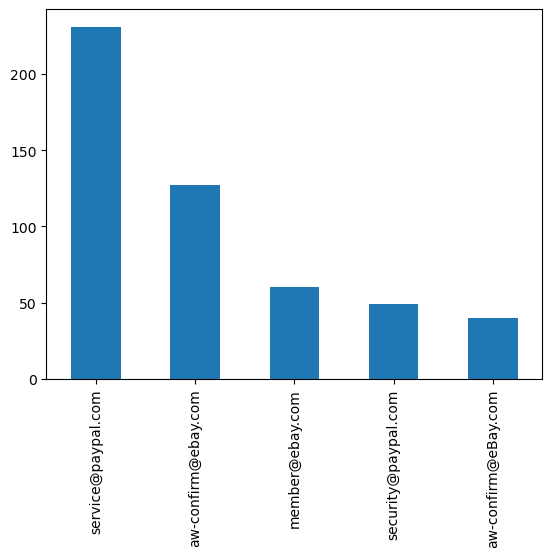

In [12]:
fig, ax = plt.subplots()
df1['From'].value_counts().head(5).plot(ax=ax, kind='bar')

And for `Safe`, we can see that RSS feeds email are the highest sent emails, and the rest are individual emails which is also make sence for normal emails

<Axes: >

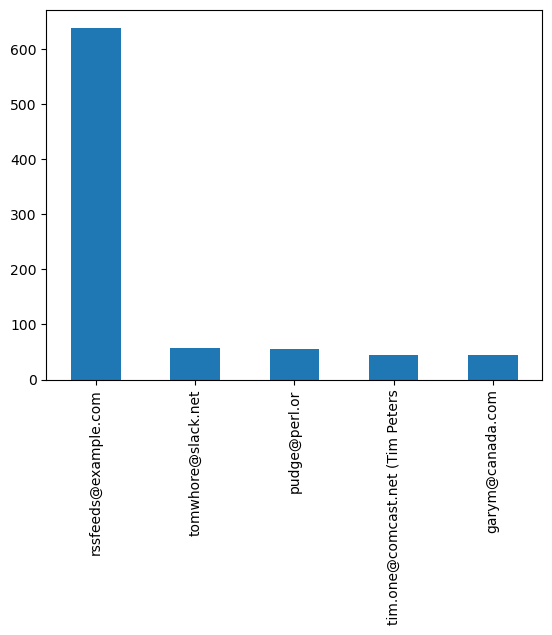

In [13]:
fig, ax = plt.subplots()
df2['From'].value_counts().head(5).plot(ax=ax, kind='bar')

In [14]:
print (df1.From.value_counts())
print (df2.From.value_counts())

service@paypal.com                       231
aw-confirm@ebay.com                      127
member@ebay.com                           60
security@paypal.com                       49
aw-confirm@eBay.com                       40
                                        ... 
offers@ebay.com                            1
eBay PowerSellers" <eBay@poseller.com      1
emailconfirm@ebay.co                       1
69hok@postbank.de                          1
operator-393568id@53.com                   1
Name: From, Length: 1206, dtype: int64
rssfeeds@example.com                     639
tomwhore@slack.net                        57
pudge@perl.or                             56
tim.one@comcast.net (Tim Peters           45
garym@canada.com                          44
                                        ... 
dm-temp-310102@nyc.rr.com                  1
vytekdemise@hotmail.com                    1
lrivers@realsoftware.com                   1
bitbitch@magnesium.net                     1
marklists@mceahe

In [15]:
print(len(df1.From.unique()))
print(len(df2.From.unique()))

1206
426


## Data Preparation
in this notebook I will keep this section very limited. The data is numerical, which makes it suitable as input to train the kNN model. Missing or corrupt values might cause issues in the modelling phase, so I'll (quickly0 check this:

In [16]:
df1.isnull().sum()

From                 0
Fullname             3
To                   5
Subject             20
Body                26
Date                 0
IP                 835
Return_Path          0
Delivered_to         0
Content_type        26
Message_Id           0
X_uid              423
Content_Length    1540
dtype: int64

In [17]:

df2.isnull().sum()

From                 0
Fullname            16
To                 153
Subject              0
Body                 0
Date                 0
IP                 848
Return_Path          0
Delivered_to       135
Content_type       401
Message_Id           0
X_uid             2551
Content_Length    2551
dtype: int64

Let us check for duplicate values in our dataset as the presence of duplicate values will hamper the accuracy of our ML model.

In [18]:
un_val= df1['From'].drop_duplicates()

In [19]:
duplicatedsValues = df1.duplicated()
print(duplicatedsValues.sum())
df1[duplicatedsValues]

0


,From,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length


 From the sample above, we can see that the `From` column is treated as index, however, we can see that the values are not unique per row because the same sender may have sent emails more than once. Hence, I will reset the index and get a default index.

In [20]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [21]:
duplicatedsValues = df2.duplicated()
print(duplicatedsValues.sum())
df2[duplicatedsValues]

0


,index,From,Fullname,To,Subject,Body,Date,IP,Return_Path,Delivered_to,Content_type,Message_Id,X_uid,Content_Length


We can remove duplicate values using drop_duplicates()

In [22]:
df2.drop_duplicates(inplace=True)

In [23]:
duplicatedsValues = df2.duplicated()
duplicatedsValues.sum()

0

### 📤 Handling missing data

After resetting the indices, let's explore further the data. By looking at the columns information we see that for some columns we have too many missing values. For example columns "Content_Length and X_uid" have too many null values. However, we need to be carefull before we can decide if we can drop them, because it could be that the value being null is a contributing factor that an email is `valid` or `phishing`.

Let's verify them carefully, by going back to the `phishing` and `valid` before they are merged.


Below we are checking the counts of the null values of the 2 columns `X_uid` and `Content_Length` for each of the datasets. We can see that in the `valid emails` the two columns have no values at all, and in the `phishing` dataset almost 75% of the Content_Length and almost 20% of X_uid values are missing.

In [24]:
print('Phishing dataframe: Count of null values in the column X_uid is {}/{} rows'.format(df1['X_uid'].isnull().sum(),len(df1.index)));
print('Phishing dataframe: Count of null values in the column Content_Length is {}/{} rows\n'.format(df1['Content_Length'].isnull().sum(),len(df1.index)));

print('Valid email dataframe: Count of null values in the column X_uid is {}/{} rows' .format(df2['X_uid'].isnull().sum(),len(df2.index)));
print('Valid email dataframe: Count of null values in the column Content_Length is {}/{} rows\n' .format(df2['Content_Length'].isnull().sum(),len(df2.index)));

print('Valid email dataframe: Count of null values in the column IP is {}/{} rows' .format(df2['IP'].isnull().sum(),len(df2.index)));
print('Valid email dataframe: Count of null values in the column IP is {}/{} rows' .format(df2['IP'].isnull().sum(),len(df2.index)));

Phishing dataframe: Count of null values in the column X_uid is 423/2239 rows
Phishing dataframe: Count of null values in the column Content_Length is 1540/2239 rows

Valid email dataframe: Count of null values in the column X_uid is 2551/2551 rows
Valid email dataframe: Count of null values in the column Content_Length is 2551/2551 rows

Valid email dataframe: Count of null values in the column IP is 848/2551 rows
Valid email dataframe: Count of null values in the column IP is 848/2551 rows


##### Now the `Content_length`, `IP` and `X_uid` columns can be dropped due to too many missing values and also their less relevance in this analysis

In [25]:
df1=df1.drop(columns=['IP','Content_Length','X_uid'])
df2=df2.drop(columns=['IP','Content_Length','X_uid'])

# Phase 3: Predictions


## ⚙️ Preprocessing 


### 🎯 Target variable

Since we have two separate datasets one for phishing emails and one for valid emails, we will first label the data by adding a new column `IsEmailPhishing` on both datasets which will indicate if an email is phishing or not. For phishing emails we put `1` and for valid emails `0`, the we will review the shapes of the datasets.

Since we have 2 datasets with differents target values, we will then merge both dataframes for further preprocessing and analysis


In [26]:
df1["IsEmailPhishing"] = 1
df2["IsEmailPhishing"] = 0

df = pd.concat([df1,df2], axis=0)
print(df.shape)

(4790, 12)


After merging, the indices of the two merged datasets will be mixed up, because the `phishing` dataset had index from 0-2239 and `valid emails` dataset index 0-2551. Meaning that resulting merged dataset will have index from `0` to `2239` duplicate. So, resetting the index is needed to have sequential index, then after getting a new index, we will drop the mixed up one

Then we can verify that our new index is sequential by checking the last 5 rows

In [27]:
df.reset_index(inplace=True)
df=df.drop(columns='index')
df.tail()

,level_0,From,Fullname,To,Subject,Body,Date,Return_Path,Delivered_to,Content_type,Message_Id,IsEmailPhishing
4785,2546,rssfeeds@example.com,newscientist <rssfeeds@example.com,yyyy@example.com,Gene technique reveals human evolution,"URL: http://www.newsisfree.com/click/-3,8714366,1440/\nDate: Not supplied\n\nA method that could allow scientists to probe our ancestors' evolution over the \nlast 20,000 years passes its first te...","Thu, 10 Oct 2002 08:04:25 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84PK14188@dogma.slashnull.org,0
4786,2547,rssfeeds@example.com,guardian <rssfeeds@example.com,yyyy@example.com,Go-ahead for new-style hospitals,"URL: http://www.newsisfree.com/click/-4,8723999,215/\nDate: 2002-10-10T03:26:52+01:00\n\n*Society:* Blair brokers Whitehall deal on trusts borrowing private cash.\n\n\n","Thu, 10 Oct 2002 08:04:10 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84AK14152@dogma.slashnull.org,0
4787,2548,rssfeeds@example.com,newscientist <rssfeeds@example.com,yyyy@example.com,Malicious code hidden in email software,"URL: http://www.newsisfree.com/click/-3,8710804,1440/\nDate: Not supplied\n\nThe new software was switched for dummy code containing a ""Trojan horse"" on its \ndownload servers\n\n\n","Thu, 10 Oct 2002 08:04:26 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84QK14191@dogma.slashnull.org,0
4788,2549,rssfeeds@example.com,guardian <rssfeeds@example.com,yyyy@example.com,'Flexible' retirement gains ground,"URL: http://www.newsisfree.com/click/-4,8724000,215/\nDate: 2002-10-10T03:26:51+01:00\n\n*Money:* Government admits millions may have to work on beyond 65.\n\n\n","Thu, 10 Oct 2002 08:04:10 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84AK14155@dogma.slashnull.org,0
4789,2550,rssfeeds@example.com,newscientist <rssfeeds@example.com,yyyy@example.com,Critical US satellites could be hacked,"URL: http://www.newsisfree.com/click/-3,8708820,1440/\nDate: Not supplied\n\nMilitary communications could be jammed or intercepted and satellites thrown \noff course or destroyed, a new US study ...","Thu, 10 Oct 2002 08:04:26 -0000",rssfeeds@example.com,yyyy@localhost.example.com,text/plain; encoding=utf-8,200210100804.g9A84QK14194@dogma.slashnull.org,0


Let's recheck the sumary of the whole dataset after merging. Now we can see that we still have some missing values. Let's start `Feature Selection` process during which we will decide if a column can be considered in our analysis. 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4790 entries, 0 to 4789
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   level_0          4790 non-null   int64 
 1   From             4790 non-null   object
 2   Fullname         4771 non-null   object
 3   To               4632 non-null   object
 4   Subject          4770 non-null   object
 5   Body             4764 non-null   object
 6   Date             4790 non-null   object
 7   Return_Path      4790 non-null   object
 8   Delivered_to     4655 non-null   object
 9   Content_type     4363 non-null   object
 10  Message_Id       4790 non-null   object
 11  IsEmailPhishing  4790 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 449.2+ KB


### 💡 Feature selection

Since for analyzing phishing emails big focus is on the sender of email than the recipient, the columns `To` and `Delivered_to` are less relevant and will not have much added value on our analysis. The same apply to `Fullname`,`Message_Id`,`date` and `Return_Path` columns. `From` column can have added value in this analyzis, however, it will not be considered for this iteration.

The most relevant columns are `Subject`and `Body` since they contains words that will be tokenized and turned to features

Let's fill missing values with `None` on `Subject` and `Body` features

In [29]:
df['Subject'].fillna('None', inplace=True)
df['Body'].fillna('None', inplace=True)

##### Leaving out non-used columns

Let's merge `Subject` text with `Body` columns in a new column `email_text`since both represent the text of an email.

Getting a subset of our dataframe by taking only `email_text` and our target value `IsEmailPhishing` and create a new dataframe `emailText_df` and view first 5 rows.

In [30]:
emailText_df=df[['Subject','Body','IsEmailPhishing']]
emailText_df['email_text']=df['Subject'] + ' ' + df['Body']
emailText_dfe=emailText_df[['email_text','IsEmailPhishing']]
emailText_df.head()

,Subject,Body,IsEmailPhishing,email_text
0,eBay account verification!,"Dear eBay User , After fraud complaints from the eBay members, the eBay Inc. had developed a security program against the fraudulend attempts of accounts thefts. For that we have to securise all t...",1,"eBay account verification! Dear eBay User , After fraud complaints from the eBay members, the eBay Inc. had developed a security program against the fraudulend attempts of accounts thefts. For tha..."
1,eBay - verify your account information,Welcome Welcome to a community of sellers that have achieved exceptional levels of success and positive feedback on eBay! We invite you to join us as a PowerSeller If you agree with this rank plea...,1,eBay - verify your account information Welcome Welcome to a community of sellers that have achieved exceptional levels of success and positive feedback on eBay! We invite you to join us as a Power...
2,Notification of limited account access,"Dear valued PayPal® member: PayPal® is committed to maintaining a safe environment for its community of buyers and sellers. To protect the security of your account, PayPal employs some of the most...",1,Notification of limited account access Dear valued PayPal® member: PayPal® is committed to maintaining a safe environment for its community of buyers and sellers. To protect the security of your a...
3,..PayPal Notification..: Update your information,"PayPal You're Billing Information! Dear PayPal Member, It has come to our attention that your PayPal Billing Information records are out of date. That requires you to update the Billing Informatio...",1,"..PayPal Notification..: Update your information PayPal You're Billing Information! Dear PayPal Member, It has come to our attention that your PayPal Billing Information records are out of date. T..."
4,We recently noticed one or more attempts to log in your account,We recently noticed one or more attempts to log in your account from a foreign IP address and we have reasons to believe that your account was used by a third party without your authorization. If ...,1,We recently noticed one or more attempts to log in your account We recently noticed one or more attempts to log in your account from a foreign IP address and we have reasons to believe that your a...


##### Tokenization and stemming

For this Iteration, I will only consider the columns `Body` and `Subject` merged as `email_text` for the analysis.
For that I will perform tokenization together with Stemming of the email text using NLTK pre processing. Within the function `text_processing`, I am using regex library to remove all ponctuations. 

Ref: GeeksforGeeks. (2023, May 16). Removing stop words with NLTK in Python. https://www.geeksforgeeks.org/removing-stop-words-nltk-python/


In [31]:
from nltk.corpus import stopwords

In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stop_words = set(stopwords.words('english'))
 
# extracting only sequence of letters and numbers from the text, converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not, return tokens without stopwords in a list of words
def text_preprocessing(dataset):
    tokens_list=[]
    for i in range(0,len(dataset)):
        text=re.sub('[^a-zA-Z0-9]',' ',dataset['email_text'][i])
        text=text.lower()
        text=text.split()
        text=[ps.stem(w) for w in text if not w in stop_words]
        text =' '.join(text)
        tokens_list.append(text)
    return tokens_list

### Text processing using NLTK

In [33]:
email_words=text_preprocessing(emailText_df)
emailText_df['email_words']=email_words
emailText_df.sample(5)

,Subject,Body,IsEmailPhishing,email_text,email_words
2712,Re: Electric car an Edsel...,"--- begin forwarded text\n\n\nStatus: RO\nFrom: A guy who models plasma all day...\nTo: ""R. A. Hettinga"" <rah@shipwright.com>\nSubject: Re: Electric car an Edsel...\nDate: Tue, 3 Sep 2002 22:49:20...",0,"Re: Electric car an Edsel... --- begin forwarded text\n\n\nStatus: RO\nFrom: A guy who models plasma all day...\nTo: ""R. A. Hettinga"" <rah@shipwright.com>\nSubject: Re: Electric car an Edsel...\nD...",electr car edsel begin forward text statu ro guy model plasma day r hettinga rah shipwright com subject electr car edsel date tue 3 sep 2002 22 49 20 0600 bob capacitor drive idea complet stupid n...
3994,[Spambayes] Deployment,"Guido van Rossum wrote:\n> I personally don't think IMAP has a bright future, but for people who\n> do use it, that's certainly a good approach.\n\nWriting an IMAP server is a non-trivial task. T...",0,"[Spambayes] Deployment Guido van Rossum wrote:\n> I personally don't think IMAP has a bright future, but for people who\n> do use it, that's certainly a good approach.\n\nWriting an IMAP server is...",spambay deploy guido van rossum wrote person think imap bright futur peopl use certainli good approach write imap server non trivial task specif huge client kind weird stuff pop easi comparison pe...
4260,"Jon Hanna, on the RSS-DEV list, says that RSS, was ""not designed\n to be of a","URL: http://scriptingnews.userland.com/backissues/2002/09/25#When:6:25:23AM\nDate: Wed, 25 Sep 2002 13:25:23 GMT\n\nJon Hanna, on the RSS-DEV list, says[1] that RSS, was ""not designed to be of \na...",0,"Jon Hanna, on the RSS-DEV list, says that RSS, was ""not designed\n to be of a URL: http://scriptingnews.userland.com/backissues/2002/09/25#When:6:25:23AM\nDate: Wed, 25 Sep 2002 13:25:23 GMT\n\...",jon hanna rss dev list say rss design url http scriptingnew userland com backissu 2002 09 25 6 25 23am date wed 25 sep 2002 13 25 23 gmt jon hanna rss dev list say 1 rss design particular use blog...
161,Barclays Bank Security Alert,"Dear user@example.com , We recently notied one or more attempts to log in to your Barclays IBank account from a different IP address. If you recently accessed your account while traveling, the unu...",1,"Barclays Bank Security Alert Dear user@example.com , We recently notied one or more attempts to log in to your Barclays IBank account from a different IP address. If you recently accessed your acc...",barclay bank secur alert dear user exampl com recent noti one attempt log barclay ibank account differ ip address recent access account travel unusu log attempt may initi howev initi log in pleas ...
1248,eBay Inc: Important Notification,"Dear eBay Member, We at eBay are sorry to inform you that we are having problems withthe billing information of your account. We wouldappreciate it if youwould visit our website eBay Account Activ...",1,"eBay Inc: Important Notification Dear eBay Member, We at eBay are sorry to inform you that we are having problems withthe billing information of your account. We wouldappreciate it if youwould vis...",ebay inc import notif dear ebay member ebay sorri inform problem withth bill inform account wouldappreci youwould visit websit ebay account activ fill outth properinform need keep ebay member thin...


### Data Shuffling

Now since our dataset is ordered starting with phishing emails and ends with valid emails. To avoid that splitting our dataset may be unbalanced, I will shuffle the dataset using the `sample` function and save the shuffled dataset in a new variable. Then will reoder the columns so we have the target variable as a last column and reset the index.

During my reading I understood that Random Forest Classification model shuffles data during training, maybe this step is not needed, but I am not sure.

In [34]:
emailText_df= emailText_df.sample(frac=1)   # this frac will shufled the data

In [35]:
emailText_df=emailText_df.reset_index(drop=True)

Changing order of the columns making the target column last and drop the `email_text` since we have a corpus column `email_words`

Ref: How to change the order of DataFrame columns? (n.d.). Stack Overflow. https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

In [36]:
cols = emailText_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
emailText_df=emailText_df[cols]
emailText_df.head()

,email_words,Subject,Body,IsEmailPhishing,email_text
0,curs india social multipl gener peasant squatter cultiv live land almost human part properti packag read get legal titl take 20 year believ 1 year ought suffici help cairo refer assum talk urban p...,RE: The Curse of India's Socialism,> You have multiple generations of\n> peasants/squatters that cultivate and live on the lands almost as a\n> human parts of the property package.\n\nWhen I'd read t...,0,RE: The Curse of India's Socialism > You have multiple generations of\n> peasants/squatters that cultivate and live on the lands almost as a\n> human parts of the p...
1,food cancer chemic reaction identifi url http www newsisfre com click 2 8435176 1440 date suppli reaction form potenti carcinogen acrylamid bake food reveal suggest way reduc level,Food 'cancer chemical' reaction identified,"URL: http://www.newsisfree.com/click/-2,8435176,1440/\nDate: Not supplied\n\nThe reaction that forms the potential carcinogen acrylamide in baked foods is \nrevealed, suggesting ways of reducing l...",0,"Food 'cancer chemical' reaction identified URL: http://www.newsisfree.com/click/-2,8435176,1440/\nDate: Not supplied\n\nThe reaction that forms the potential carcinogen acrylamide in baked foods i..."
2,author request ad terryhack yahoo com jp new email address paypal account author chang need assist account pleas use paypal email restor servic http www paypal com us cgi bin webscr email login th...,Authorization Request,"You have added terryhacker@yahoo.com.jp as a new email address for your PayPal account. If you did not authorize this change or if you need assistance with your account, please use PayPal email re...",1,"Authorization Request You have added terryhacker@yahoo.com.jp as a new email address for your PayPal account. If you did not authorize this change or if you need assistance with your account, plea..."
3,import secur center advisori,Important Security Center Advisory.,"[, ]",1,"Important Security Center Advisory. [, ]"
4,zzzzteana hitler style applic welcom parti time septemb 06 2002 hitler style applic welcom parti roger boy manag germani polit parti difficulti explain enthusiast reaction man appli membership let...,[zzzzteana] Hitler-style applicant welcomed by parties,"The Times\n \n \n September 06, 2002\n \n Hitler-style applicant welcomed by parties\n By Roger Boyes\n \n \n \n MANAGERS of Germanys political parties are having difficulty explaining their\n en...",0,"[zzzzteana] Hitler-style applicant welcomed by parties The Times\n \n \n September 06, 2002\n \n Hitler-style applicant welcomed by parties\n By Roger Boyes\n \n \n \n MANAGERS of Germanys politi..."


Assigning feature and target to variables

In [46]:
X = emailText_df['email_words']
y = emailText_df['IsEmailPhishing']

### 🪓 Splitting into train/test

After assigning the feature and target to X and Y variables, I am going to split the train and test data. As per examples in class, I am using 20% for test data and 80% for train data. I also choose random_state of 80.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 4790 observations, of which 3832 are now in the train set, and 958 in the test set.


## 🧬 Modelling
In this step only the train set is used to fit the model, which in this case uses a Random forest Classifier algorithm for classification named sklearn.ensemble. Ref: RandomForestClassifier. (n.d.-b). Scikit-learn. https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html And after that the test set is used to calculate the model's accuracy, in other words how well it performs. Accuracy is a fraction where any value closer to 1 is considered better, and 1 itself (100% accurate) is usually impossible.

Since NLP doesn't understand textual data, the words need some how to be encorded in numbers. Here I am using CountVectorizer to encode our email texts(tokens) to a vector based on the count of each word that occurs in an email. Ref: Prashantrajkaggle. (2023, July 4). Spam message classification with NLP. Kaggle. https://www.kaggle.com/code/prashantrajkaggle/spam-message-classification-with-nlp/notebook



In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer(max_features=2000,ngram_range=(1,2))
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [49]:
features = cv.get_feature_names_out()

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier().fit(X_train,y_train)
y_pred=classifier.predict(X_test)

In [51]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)

0.9958246346555324

In [52]:
confusion_matrix(y_test,y_pred)

array([[504,   2],
       [  2, 450]], dtype=int64)

## 🔬 Evaluation

Looking at the accuracy score we see that this model perform very well as it is predicting with 99% accuracy. We have some hyperparameters `max_features` and `ngram_range` used in the CountVectorizer that may playing a role in the performance of this model. However, myself I am not able to explain them at the moment(More reading needed). I got idea on this `Modeling` part from Prashantrajkaggle. Ref: Prashantrajkaggle. (2023, July 4). Spam message classification with NLP. Kaggle. https://www.kaggle.com/code/prashantrajkaggle/spam-message-classification-with-nlp/notebook

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       506
           1       1.00      1.00      1.00       452

    accuracy                           1.00       958
   macro avg       1.00      1.00      1.00       958
weighted avg       1.00      1.00      1.00       958



# Prediction with KNN Algorithm



Looking at the report above, I suspect that there is something wrong with my train data because the accuracy of 100% is almost impossible. Probably we need to increase the amount of the train data or max_features. 

As per feedback received from my teachers, I will try other algorthms and vectorizer and compare the results.
Let's start with KNeighborsClassifier with the same vectorizer `CountVectorizer`

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.918580375782881


Using KNN with CountVectorizer we are getting an accuracy of 92%. We can run our model on train and test data and compare their classification results and check if this performance is not an overfitting or underfitting. 

We can see that the accuracy on both train and test data are almost similar, so we can say that there is no overfitting, however, we can see that the `precision` is much higher and `recall`, which may mean our model is underfitting

In [55]:
knn_train_pred = model.predict(X_train)
knn_train_report= classification_report(y_train,knn_train_pred)
print(knn_train_report)

knn_test_pred = model.predict(X_test)
knn_test_report= classification_report(y_test,knn_test_pred)
print(knn_test_report)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94      2045
           1       0.88      1.00      0.94      1787

    accuracy                           0.94      3832
   macro avg       0.94      0.94      0.94      3832
weighted avg       0.94      0.94      0.94      3832

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       506
           1       0.85      1.00      0.92       452

    accuracy                           0.92       958
   macro avg       0.93      0.92      0.92       958
weighted avg       0.93      0.92      0.92       958



In the above model we used default values of hyperparameters, for example n_neighbors (K) is 5 by default.

Let's search an optimal K value which will improve our model with less error rate.
We are going to run the KNeighborsClassifier model with K values in range 1 to 10 and visualize in a plot to see which K will produce minimal error rate.

Minimum error:  0.03653444676409186 at K = 2


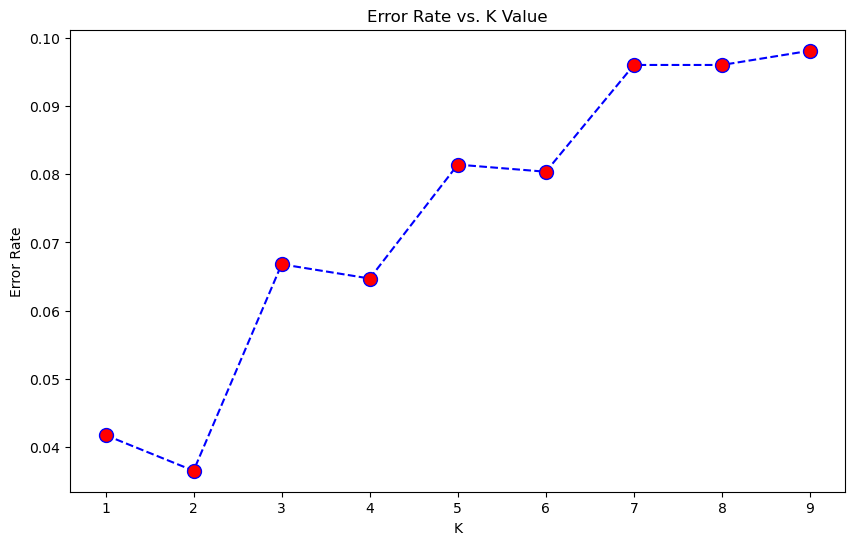

In [56]:
from sklearn import metrics
acc=[]
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error: ",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)


We find that K=2 produces the lowest error rate of 0.040, and we are validating this by plotting the accuracy against K values and got the best accuracy of 95,9% when K=2

Maximum accuracy:  0.9634655532359081 at K = 2


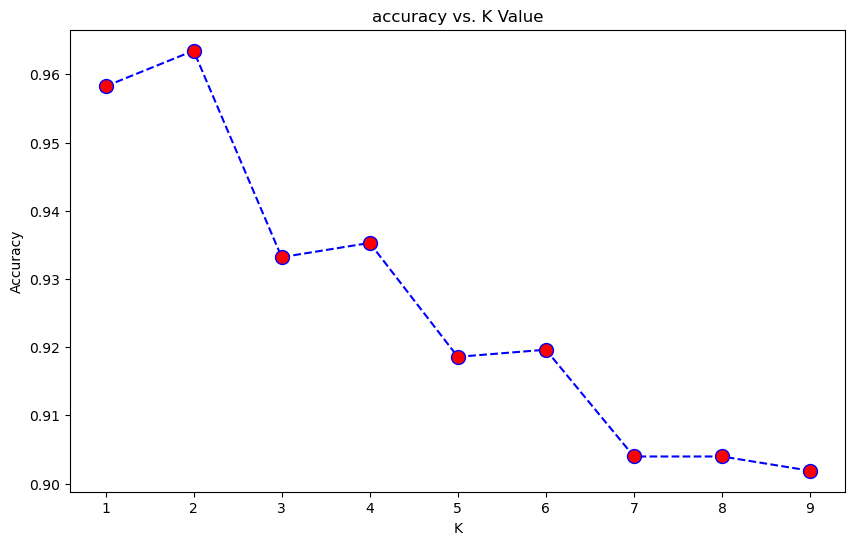

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),acc,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy: ",max(acc),"at K =",acc.index(max(acc))+1)

#### Using TF-IDF as a text tokenizer and vectorizer

The goal of using tf-idf is that it not only focuses on the frequency of words present in the corpus as `CountVectorizer`, but also provides the weight of the words. Sklearn.feature_extraction.text.TfidFVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.t


In [58]:
tfidf_vectorizer = TfidfVectorizer(min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(emailText_df['email_text']).toarray()
tf_X_vectorized.shape

(4790, 1324)

In [59]:
X = pd.DataFrame(tf_X_vectorized)
X['email_text'] = emailText_df["email_text"].values
y = emailText_df["IsEmailPhishing"]
X.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,1315,1316,1317,1318,1319,1320,1321,1322,1323,email_text
3256,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.27,0.00,0.00,0.00,0.00,0.00,0.08,"[zzzzteana] Moscow bomber Man Threatens Explosion In Moscow \n\nThursday August 22, 2002 1:40 PM\nMOSCOW (AP) - Security officers on Thursday seized an unidentified man who\nsaid he was armed with..."
215,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,FPA NOTICE: eBay Registration Suspension - User Agreement - Abusing\n eBay eBay sent this message to your registered email address. Your registered name is included to show this message originated...
930,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Account Authentication Required []
3164,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,...,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Question from eBay Member eBay sent this message to youYour registered name is included to show this message originated from eBay. Learn more. Question about Item -- Respond Now eBay sent this mes...
2149,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.07,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,"Re: [Webdev] mod_usertrack Thanks for the info AJ, I found ""weblog"" at \nhttp://awsd.com/scripts/weblog/index.shtml which has some click-path \nreporting. It's simple, but works. Report generation..."


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 4790 observations, of which 3832 are now in the train set, and 958 in the test set.


In [61]:
X_train = X_train.drop(['email_text'], axis=1)
X_email_text = X_test['email_text']
X_test = X_test.drop(['email_text'], axis=1)

In [62]:
k=2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
score = model.score(X_test.values, y_test)

print("Accuracy:", score)

Accuracy: 0.8851774530271399


These classification reports shows that we have overfitting in our train data because the model perform well on train data `100%` and and a big difference gat on test data`89%`.

In [63]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2045
           1       1.00      1.00      1.00      1787

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

              precision    recall  f1-score   support

           0       0.99      0.79      0.88       506
           1       0.81      1.00      0.89       452

    accuracy                           0.89       958
   macro avg       0.90      0.89      0.88       958
weighted avg       0.91      0.89      0.88       958



Let's try to perform hyperparameter tuning by reducing the max_features to 200, which will give use data with shape (4790, 200) 

In [64]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,min_df=.01, use_idf =True, stop_words = 'english')
tf_X_vectorized = tfidf_vectorizer.fit_transform(emailText_df['email_text']).toarray()
tf_X_vectorized.shape

(4790, 200)

Let's add the email text that was removed by the vectorizer

In [65]:
X = pd.DataFrame(tf_X_vectorized)
X['email_text'] = emailText_df["email_text"].values
y = emailText_df["IsEmailPhishing"]

Splitting Train and Test data by 80% train and 20% test data

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 4790 observations, of which 3832 are now in the train set, and 958 in the test set.


remove email text from the train and test data for running the model

In [67]:
X_train = X_train.drop(['email_text'], axis=1)
X_email_text = X_test['email_text']
X_test = X_test.drop(['email_text'], axis=1)

In [68]:
k=2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
score = model.score(X_test.values, y_test)

print("Accuracy:", score)

Accuracy: 0.9780793319415448


Now the accuracy has increased a lot to 98% which is almost perfect performance. 

In [69]:
pred = model.predict(X_train.values)
report= classification_report(y_train,pred)
print(report)

pred = model.predict(X_test.values)
report= classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2045
           1       1.00      0.99      1.00      1787

    accuracy                           1.00      3832
   macro avg       1.00      1.00      1.00      3832
weighted avg       1.00      1.00      1.00      3832

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       506
           1       0.97      0.99      0.98       452

    accuracy                           0.98       958
   macro avg       0.98      0.98      0.98       958
weighted avg       0.98      0.98      0.98       958



## Evaluation

Creating labels with meaningful names add a column for phishing and safe and also the actual email text in the predictions dataframe 

In [70]:
label_map = {"phishing": 1, "safe": 0}
predictions = pd.DataFrame(pred)
predictions["truth"] = y_test.map(dict((v,k) for k, v in label_map.items())).values
predictions["text"] = X_email_text.values
predictions.sample(10)

,0,truth,text
47,0,safe,"Flying cars here, jetpacks next? URL: http://boingboing.net/#85485805\nDate: Not supplied\n\nMoller, a public company in Davis, California, has developed a flying car. \n\n [IMG: http://www.cr..."
835,1,phishing,"Limited Account Access Appeal Denied Dear PayPal Member, Every business must balance its exposure to risk with its business goals. At this time, we are not comfortable with the amount of risk your..."
782,1,safe,"Re: OSCOM Berkeley report: Xopus, Bitflux, Plone, Xoops On Friday, September 27, 2002, at 11:17 AM, Jim Whitehead wrote:\n\n> I attended the OSCOM Open Source Content Management workshop at \n> Be..."
590,0,safe,"Re: Mplayer Once upon a time, Roi wrote :\n\n> Since I upgraded to redhat8 mplayer -vo sdl isnt working for me\n> It gives me black screen and I only hear sound.\n> \n> can anyone help me with thi..."
603,1,phishing,"BB&T: official information! (message id: mv385437087f) [, ]"
176,0,safe,"Bush Covers the Waterfront This is a multi-part message in MIME format...\n\n------------=_1034083278-26594-4\nContent-Type: text/plain; charset=""iso-8859-1""\nContent-Disposition: inline\nContent-..."
927,1,safe,"Re: results for giant mass-check (phew) I never claimed it could learn *all* combinatorial \npossibilities, but it certainly can learn some.\n\nC\n\nOn Thursday, August 22, 2002, at 07:21 PM, Sco..."
1,1,phishing,"Security Measures [, ]"
180,1,phishing,"eBay Inc: Important Notification Dear eBay Member, We at eBay are sorry to inform you that we are having problems withthe billing information of your account. We wouldappreciate it if youwould vis..."
41,1,phishing,Question About Item -- Respond Now eBay sent this message to you. Your registered name is included to show this message originated from eBay. Learn more. Question about Item -- Respond Now eBay se...
